In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [37]:
df = pd.read_csv("./flood.csv")

In [3]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [38]:
for column in df.columns:
    min, max = (df[column].min(), df[column].max())
    print(f"{column}, min -{min}, max -{max}")

MonsoonIntensity, min -0, max -16
TopographyDrainage, min -0, max -18
RiverManagement, min -0, max -16
Deforestation, min -0, max -17
Urbanization, min -0, max -17
ClimateChange, min -0, max -17
DamsQuality, min -0, max -16
Siltation, min -0, max -16
AgriculturalPractices, min -0, max -16
Encroachments, min -0, max -18
IneffectiveDisasterPreparedness, min -0, max -16
DrainageSystems, min -0, max -17
CoastalVulnerability, min -0, max -17
Landslides, min -0, max -16
Watersheds, min -0, max -16
DeterioratingInfrastructure, min -0, max -17
PopulationScore, min -0, max -19
WetlandLoss, min -0, max -22
InadequatePlanning, min -0, max -16
PoliticalFactors, min -0, max -16
FloodProbability, min -0.285, max -0.725


In [39]:
df.isna().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

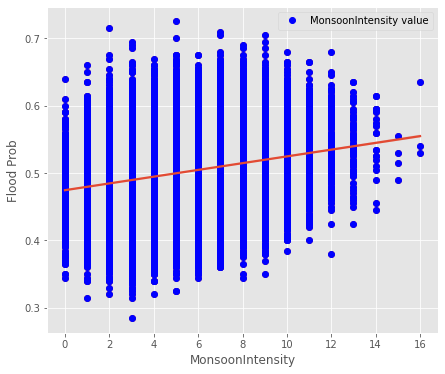

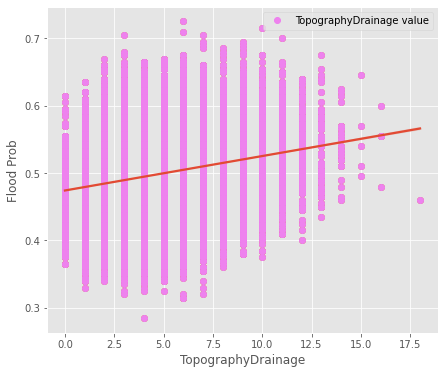

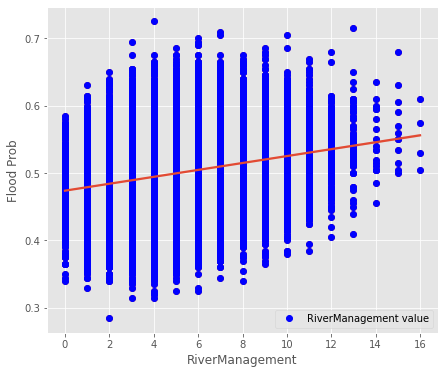

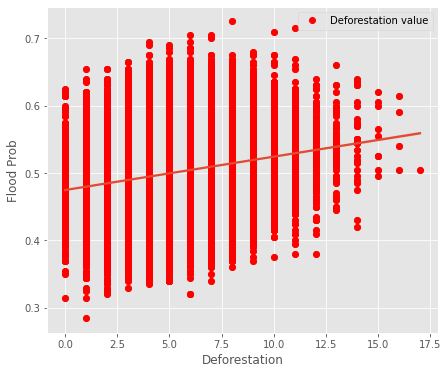

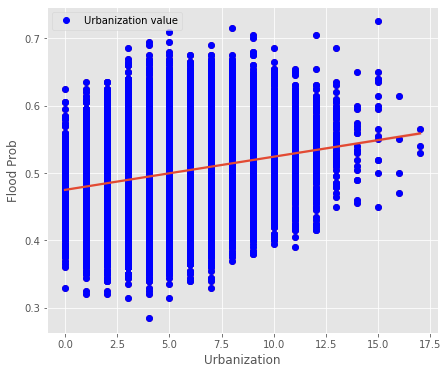

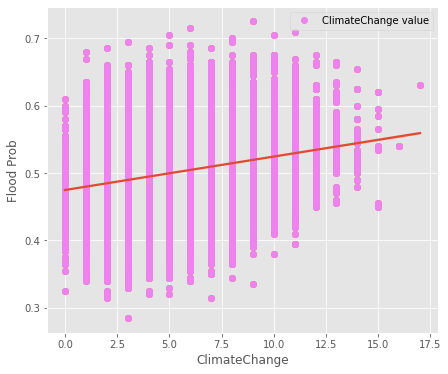

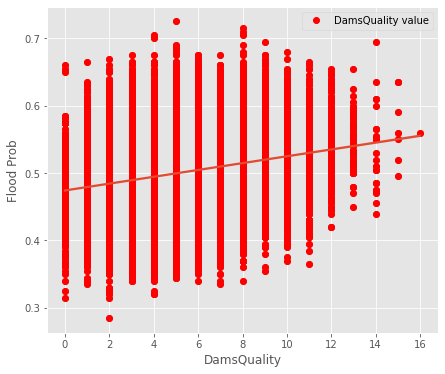

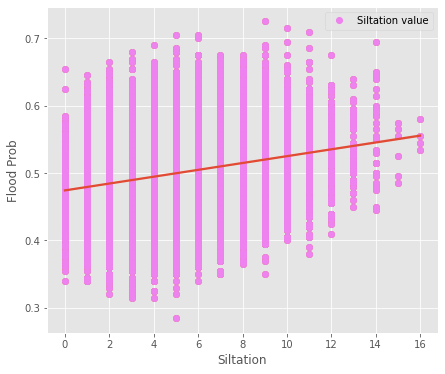

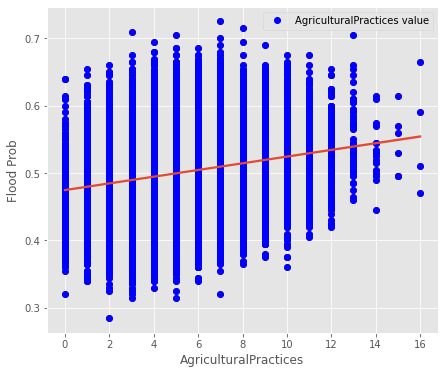

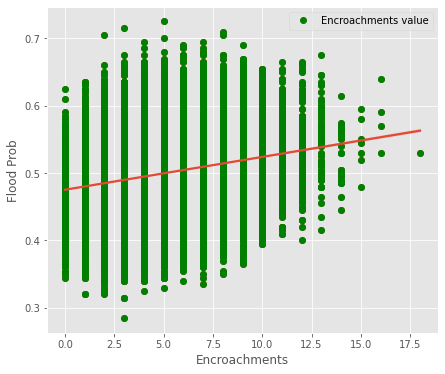

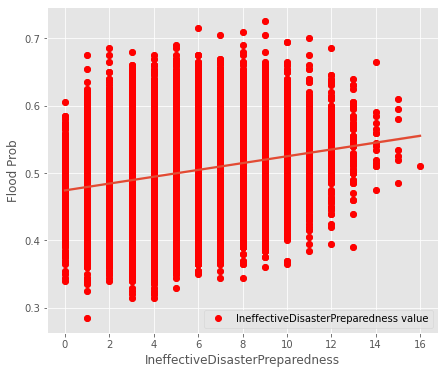

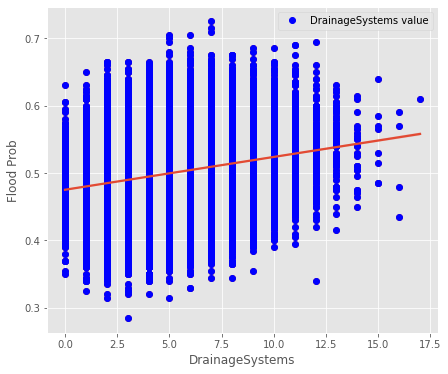

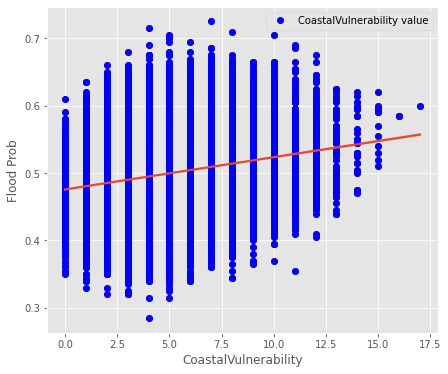

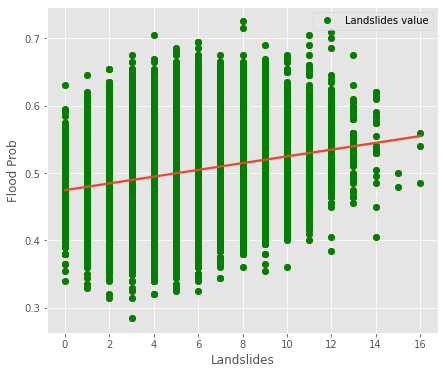

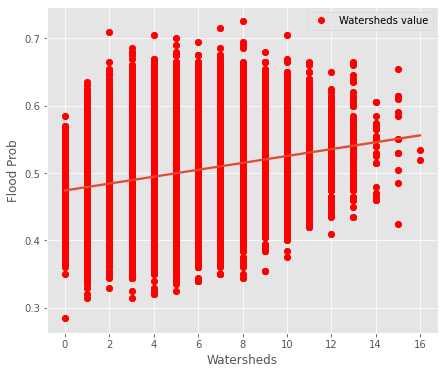

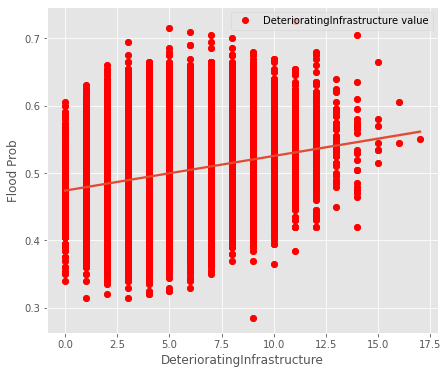

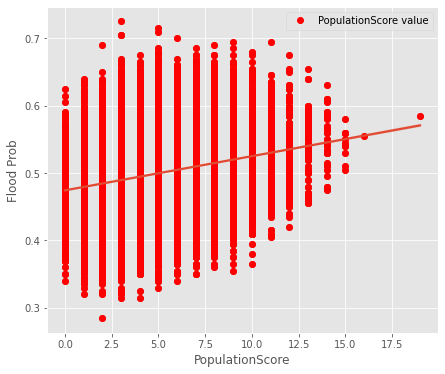

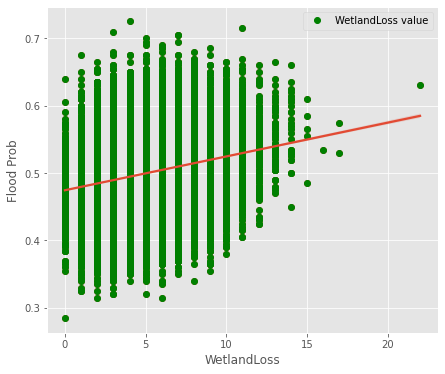

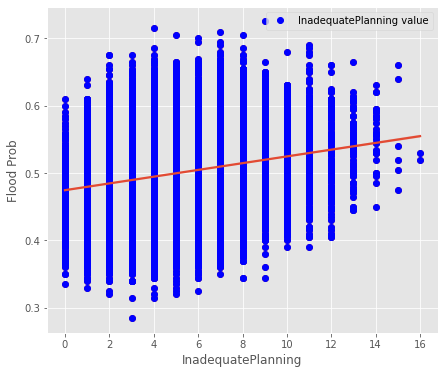

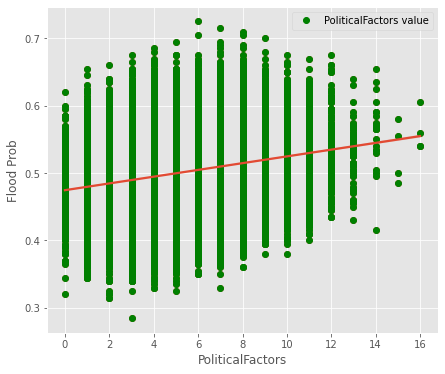

In [40]:
import random
import seaborn as sns
for column in df.columns:
    colors = ["blue", "red",  "orange", "green", "violet"]
    if column != "FloodProbability":
        color_choice = random.choice(colors)
        fig, ax = plt.subplots(figsize=(7,6))
        ax.plot(df[column], df["FloodProbability"], "o", color=color_choice, label = f"{column} value")
        sns.regplot(x= df[column], y=df["FloodProbability"])
        plt.ylabel("Flood Prob")
        plt.xlabel(f"{column}")
        plt.legend()
        plt.show()
        plt.close()

In [51]:
def create_box_plot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
    plt.close()

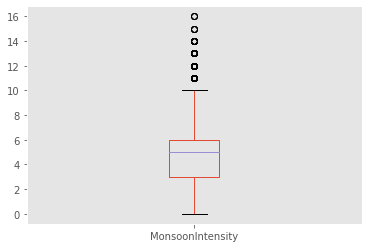

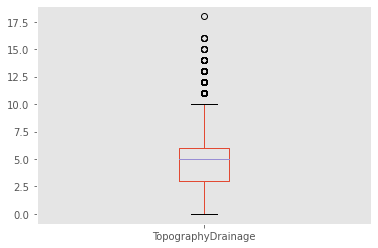

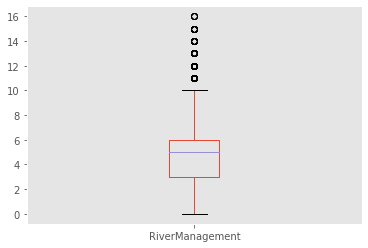

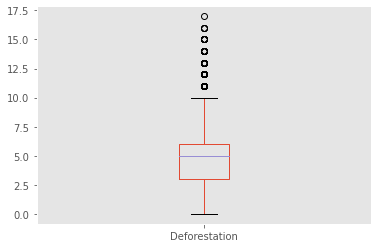

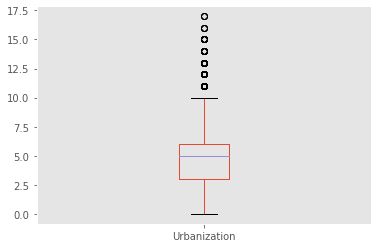

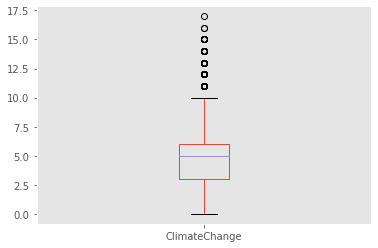

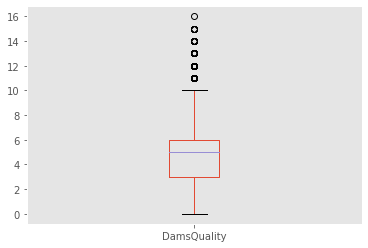

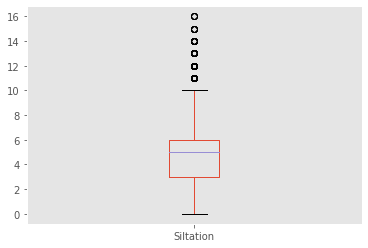

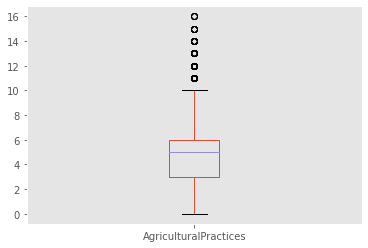

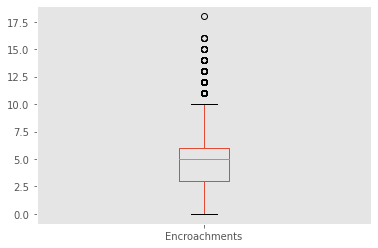

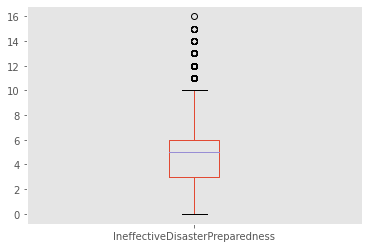

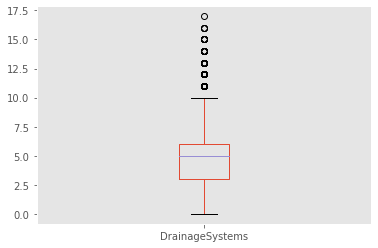

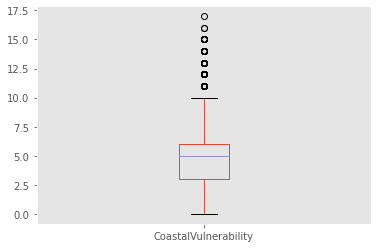

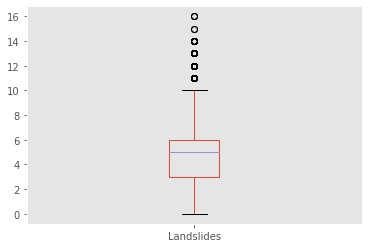

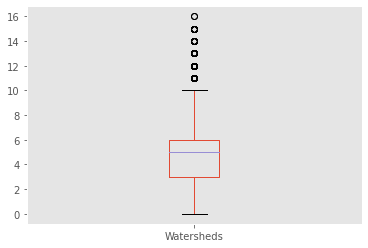

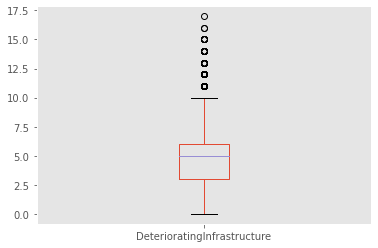

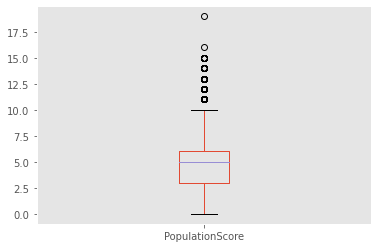

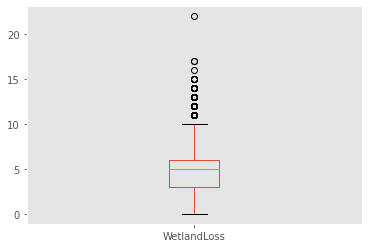

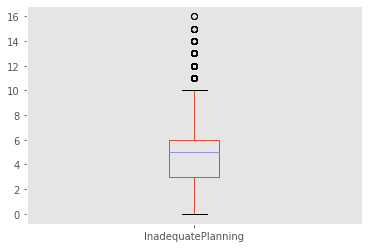

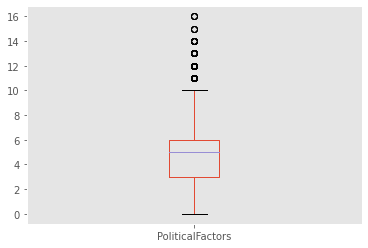

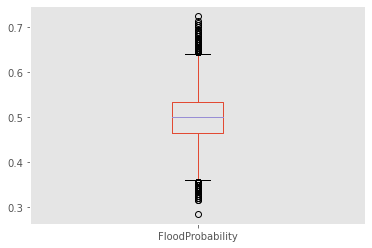

In [52]:
for column in df.columns:
    create_box_plot(df, column)

In [43]:
# Data preprocessing
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)